In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\SRH\Master Thesis\description.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29321 entries, 0 to 29320
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PMCID          29321 non-null  int64  
 1   PMID           27831 non-null  float64
 2   DOI            28637 non-null  object 
 3   Title          29321 non-null  object 
 4   Abstract       27009 non-null  object 
 5   Subject Terms  28169 non-null  object 
 6   Article URL    29321 non-null  object 
 7   Image URL      29321 non-null  object 
 8   Caption        26907 non-null  object 
 9   Category       29321 non-null  object 
 10  Image_Name     29321 non-null  object 
 11  xml_url        29321 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.7+ MB


In [4]:
df['Corpus'] = df['Title'] + ' ' + df['Abstract'] + ' ' + df['Category']

In [5]:
# Function to preprocess the text data
def preprocess_text(text):
    if isinstance(text, str):  # Check if it's a non-null string
        # Convert to lowercase
        text = text.lower()
        # Tokenize the text
        words = nltk.word_tokenize(text)
        # Remove punctuation and non-alphabetic characters
        words = [word for word in words if word.isalpha()]
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        return ''  # Return an empty string for NaN values

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\p_k_s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\p_k_s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Apply text preprocessing to the corpus
df['Processed_Corpus'] = df['Corpus'].apply(preprocess_text)

# Combine the processed text from all rows into a single string
combined_text = ' '.join(df['Processed_Corpus'])

In [8]:
# Generate word frequency count
word_frequency = nltk.FreqDist(combined_text.split())

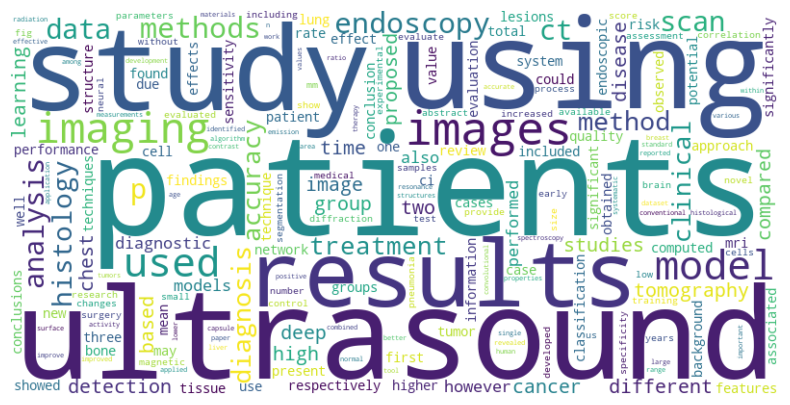

In [9]:
# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [11]:
# Tokenize the text data for topic modeling
tokenized_corpus = df['Processed_Corpus'].apply(nltk.word_tokenize)

# Create a dictionary and bag-of-words representation of the text data
dictionary = Dictionary(tokenized_corpus)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_corpus]

In [12]:
# Build the LDA model
num_topics = 10  # Set the number of topics you want to discover
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

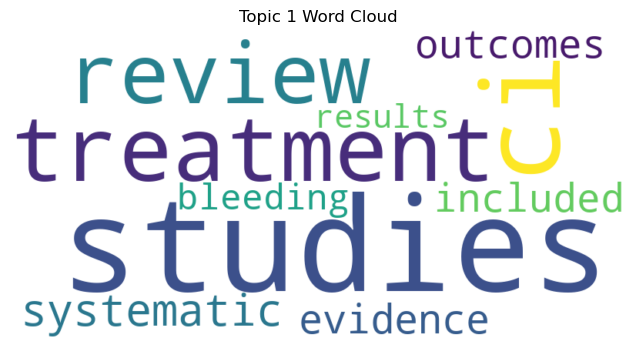

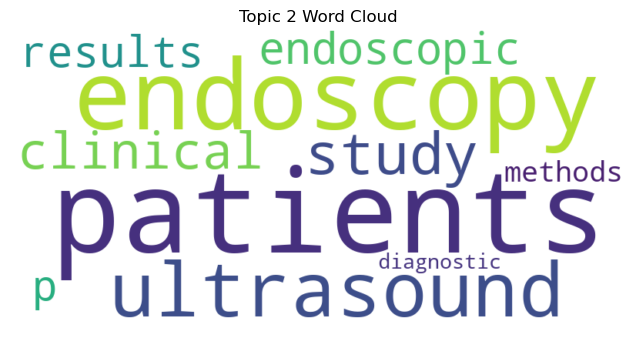

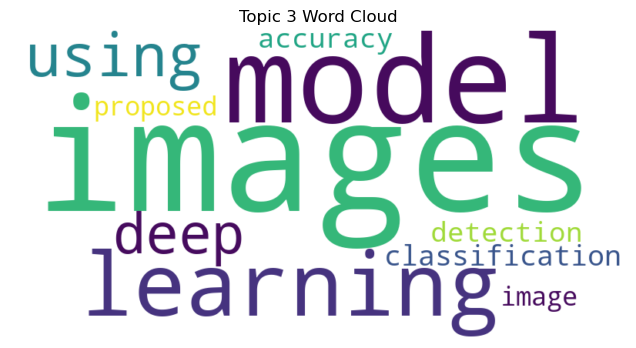

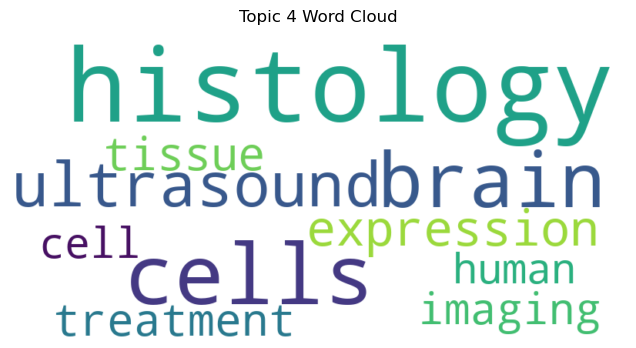

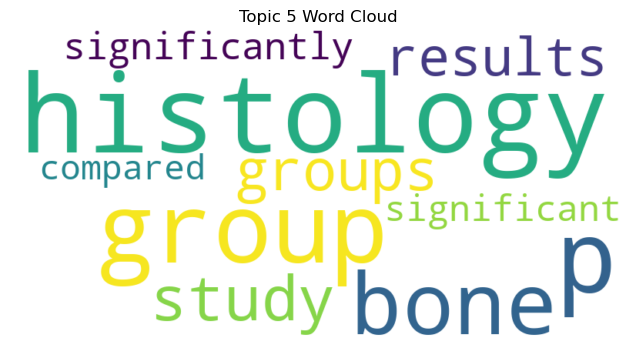

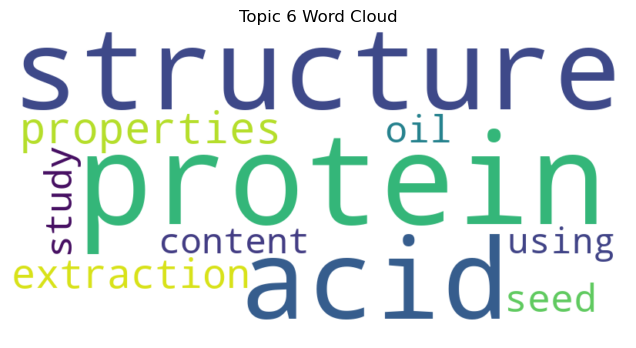

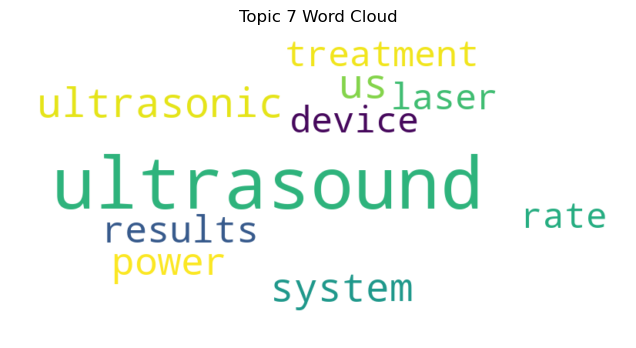

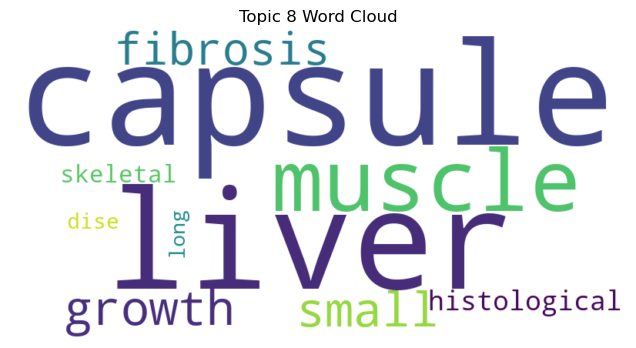

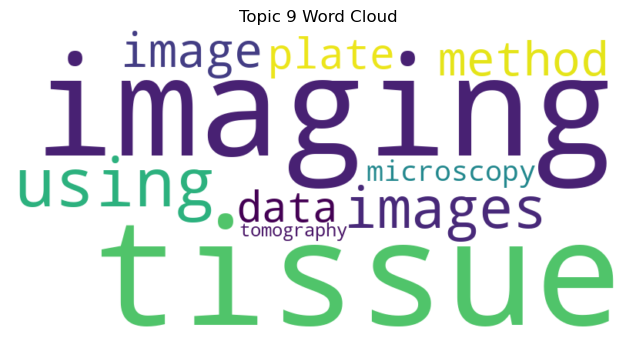

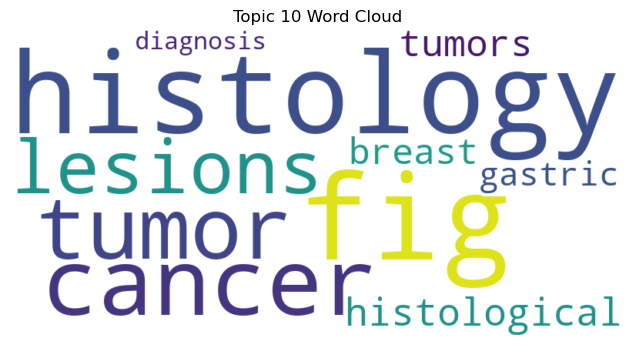

In [13]:
# Extract the top words for each topic and create word clouds
for topic_num in range(num_topics):
    topic_words = lda_model.show_topic(topic_num, topn=10)  # Get the top 10 words for the topic
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud for each topic
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_num + 1} Word Cloud')
    plt.axis("off")
    plt.show()

In [14]:
# Merge the top words from each topic into a single text
top_words_text = ''
for topic_num in range(num_topics):
    topic_words = lda_model.show_topic(topic_num, topn=2)  # Get the top 10 words for the topic
    print(topic_words)
    top_words = [word for word, _ in topic_words]
    top_words_text += ' '.join(top_words) + ' '

[('studies', 0.024686053), ('ci', 0.01613535)]
[('patients', 0.04098237), ('endoscopy', 0.028181916)]
[('images', 0.026012655), ('model', 0.018732863)]
[('histology', 0.014731369), ('cells', 0.0094975345)]
[('histology', 0.024391616), ('p', 0.021237617)]
[('protein', 0.008153427), ('structure', 0.0076659974)]
[('ultrasound', 0.059863344), ('ultrasonic', 0.0076780743)]
[('capsule', 0.027528187), ('liver', 0.02563373)]
[('tissue', 0.014809218), ('imaging', 0.013327883)]
[('fig', 0.0463409), ('histology', 0.04188761)]


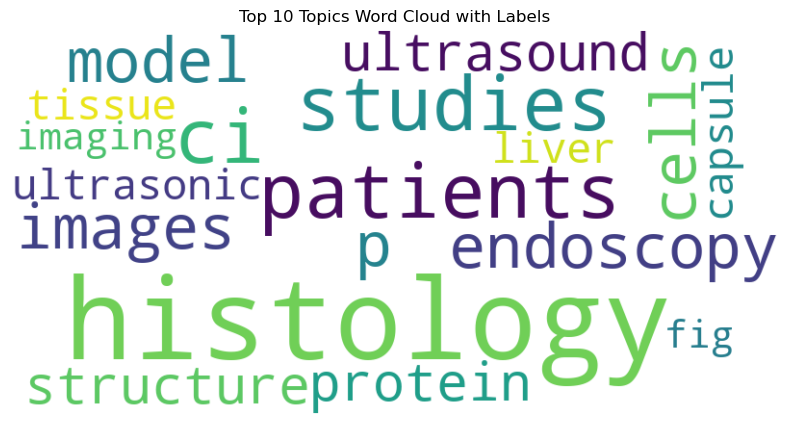

In [15]:
# Create the word cloud with labels
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_words_text)

# Plot the word cloud with labels
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 10 Topics Word Cloud with Labels')
plt.axis("off")
plt.show()

Output(layout=Layout(height='400px', width='800px'), outputs=({'output_type': 'display_data', 'data': {'text/p…

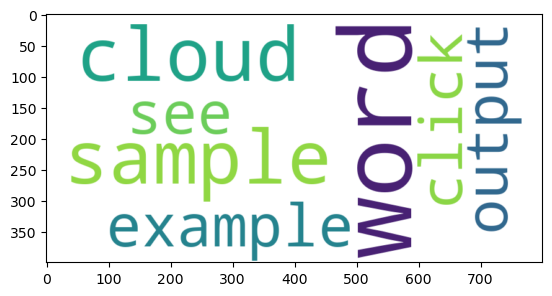

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sample text data
text_data = "This is a sample word cloud example. You can click on words to see output."

# Function to display output when a word is clicked
def on_word_click(change):
    clear_output()
    word = change['owner'].value
    print(f"You clicked on the word: {word}")
    # Add your custom logic here to display the output based on the clicked word.

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Create an interactive widget for the word cloud
wordcloud_widget = widgets.Output()
wordcloud_widget.append_display_data(plt.imshow(wordcloud, interpolation='bilinear'))
wordcloud_widget.layout.height = '400px'
wordcloud_widget.layout.width = '800px'
wordcloud_widget.observe(on_word_click, names='value')

# Display the word cloud widget
display(wordcloud_widget)


In [17]:
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go

def plotly_wordcloud(text):
    wc = WordCloud(stopwords = set(STOPWORDS),
                   max_words = 200,
                   max_font_size = 100)
    wc.generate(text)
    
    word_list=[]
    freq_list=[]
    fontsize_list=[]
    position_list=[]
    orientation_list=[]
    color_list=[]

    for (word, freq), fontsize, position, orientation, color in wc.layout_:
        word_list.append(word)
        freq_list.append(freq)
        fontsize_list.append(fontsize)
        position_list.append(position)
        orientation_list.append(orientation)
        color_list.append(color)
        
    # get the positions
    x=[]
    y=[]
    for i in position_list:
        x.append(i[0])
        y.append(i[1])
            
    # get the relative occurence frequencies
    new_freq_list = []
    for i in freq_list:
        new_freq_list.append(i*100)
    new_freq_list
    
    trace = go.Scatter(x=x, 
                       y=y, 
                       textfont = dict(size=new_freq_list,
                                       color=color_list),
                       hoverinfo='text',
                       hovertext=['{0}{1}'.format(w, f) for w, f in zip(word_list, freq_list)],
                       mode='text',  
                       text=word_list
                      )
    
    layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
    
    fig = go.Figure(data=[trace], layout=layout)
    
    return fig

In [20]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


text = top_words_text

iplot(plotly_wordcloud(text))